In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *


In [2]:
import sys
import os

module_path = os.path.abspath(os.path.join('/home/renatochaz/git/economic_policy_uncertainty/'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
ds = pd.read_csv(f'{module_path}/global.csv')

### INV x EPU

In [4]:
inv = ds.copy()
inv = inv.groupby(['ano'], as_index=False).agg({'inv':'mean'})

In [5]:
epu = ds.copy()
epu = epu.groupby(['ano'], as_index=False).agg({'ln_epu':'mean'})
pds = inv.join(epu['ln_epu'])

In [6]:
cmap = cm.get_cmap('Set2')
for i in range(cmap.N):
    rgba = cmap(i)
    # rgb2hex accepts rgb or rgba
    print(matplotlib.colors.rgb2hex(rgba))

#66c2a5
#fc8d62
#8da0cb
#e78ac3
#a6d854
#ffd92f
#e5c494
#b3b3b3


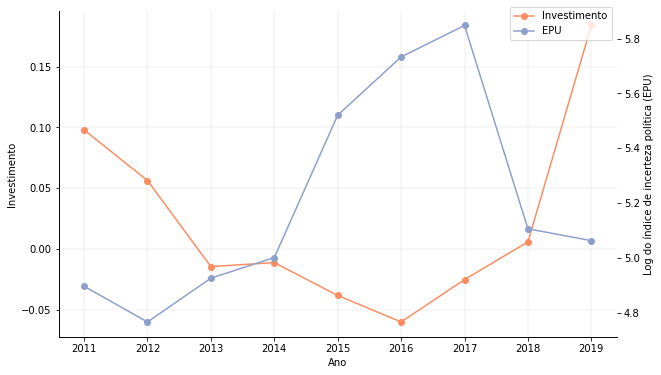

In [7]:
ax = pds.plot(
    x='ano',
    y='inv',
    legend=False,
    label='Investimento',
    marker='o',
    color='#fc8d62'
    )
ax.set(
    xlabel = 'Ano',
    ylabel = 'Investimento'
    )
ax2 = ax.twinx()
pds.plot(
    x='ano',
    y='ln_epu',
    ax=ax2,
    legend=False,
    marker='o',
    color='#8da0cb', 
    figsize=(10,6),
    label='EPU'
    )
ax.figure.legend(loc='upper right', ncol=1, bbox_to_anchor=(0.9, 0.9))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax2.set_ylabel('Log do índice de incerteza política (EPU)')
plt.show()

### INV x IIE-BR

In [8]:
iie = ds.copy()

In [9]:
iie['iee'] = np.log(iie['iee'])
iie = iie.groupby(['ano'], as_index=False).agg({'iee':'mean'})
pds = inv.join(iie['iee'])

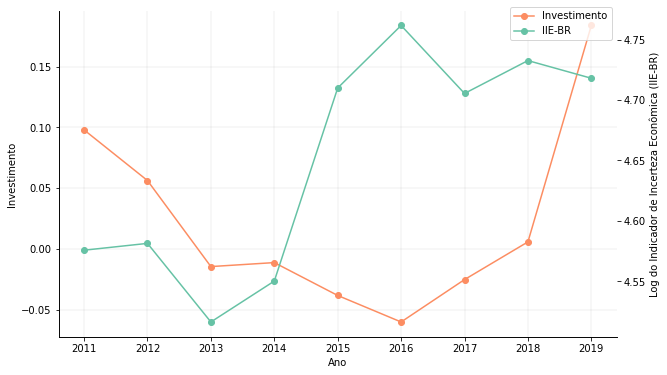

In [10]:
ax = pds.plot(
    x='ano',
    y='inv',
    legend=False,
    label='Investimento',
    marker='o',
    color='#fc8d62'
    )
ax.set(
    xlabel = 'Ano',
    ylabel = 'Investimento'
    )
ax2 = ax.twinx()
pds.plot(
    x='ano',
    y='iee',
    ax=ax2,
    legend=False,
    marker='o',
    color='#66c2a5', 
    figsize=(10,6),
    label='IIE-BR'
    )
ax.figure.legend(loc='upper right', ncol=1, bbox_to_anchor=(0.9, 0.9))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax2.set_ylabel('Log do Indicador de Incerteza Econômica (IIE-BR)')
plt.show()

### INV x Financials

In [26]:
inv_cons = ds.copy()
inv_un = ds.copy()

In [27]:
kz_cons = inv_cons[inv_cons['dum_kz'] == 1]
ks_un = inv_un[inv_un['dum_kz'] == 0]

kz_cons = kz_cons.groupby(['ano'], as_index=False).agg({'inv':'mean', 'q_tobin':'mean','fc':'mean', 'tamanho':'mean', 'cv':'mean', 'divida':'mean','dum_kz': 'first'})
ks_un = ks_un.groupby(['ano'], as_index=False).agg({'inv':'mean', 'q_tobin':'mean','fc':'mean', 'tamanho':'mean', 'cv':'mean', 'divida':'mean','dum_kz': 'first'})
inv_res = pd.concat([kz_cons, ks_un])
inv_res['restricao'] = ['KZ Restritas','KZ Restritas','KZ Restritas','KZ Restritas',
'KZ Restritas','KZ Restritas','KZ Restritas','KZ Restritas','KZ Restritas','KZ Não Restritas','KZ Não Restritas','KZ Não Restritas',
'KZ Não Restritas','KZ Não Restritas','KZ Não Restritas','KZ Não Restritas','KZ Não Restritas','KZ Não Restritas']

In [28]:
ww_cons = inv_cons[inv_cons['dum_ww'] == 1]
ww_un = inv_un[inv_un['dum_ww'] == 0]

ww_cons = ww_cons.groupby(['ano'], as_index=False).agg({'inv':'mean', 'q_tobin':'mean','fc':'mean','tamanho':'mean','cv':'mean', 'divida':'mean', 'dum_ww': 'first'})
ww_un = ww_un.groupby(['ano'], as_index=False).agg({'inv':'mean', 'q_tobin':'mean','fc':'mean', 'tamanho':'mean','cv':'mean', 'divida':'mean','dum_ww': 'first'})
ww_res = pd.concat([ww_cons, ww_un], axis=0)
ww_res['restricao'] = ['WW Restritas','WW Restritas','WW Restritas','WW Restritas',
'WW Restritas','WW Restritas','WW Restritas','WW Restritas','WW Restritas','WW Não Restritas','WW Não Restritas','WW Não Restritas',
'WW Não Restritas','WW Não Restritas','WW Não Restritas','WW Não Restritas','WW Não Restritas','WW Não Restritas']

In [29]:
sa_cons = inv_cons[inv_cons['dum_sa'] == 0]
sa_un = inv_un[inv_un['dum_sa'] == 1]

sa_cons = sa_cons.groupby(['ano'], as_index=False).agg({'inv':'mean', 'q_tobin':'mean','fc':'mean', 'tamanho':'mean','cv':'mean', 'divida':'mean','dum_sa': 'first'})
sa_un = sa_un.groupby(['ano'], as_index=False).agg({'inv':'mean', 'q_tobin':'mean','fc':'mean', 'tamanho':'mean','cv':'mean', 'divida':'mean','dum_sa': 'first'})
sa_res = pd.concat([sa_cons, sa_un], axis=0)
sa_res['restricao'] = ['SA Restritas','SA Restritas','SA Restritas','SA Restritas',
'SA Restritas','SA Restritas','SA Restritas','SA Restritas','SA Restritas','SA Não Restritas','SA Não Restritas','SA Não Restritas',
'SA Não Restritas','SA Não Restritas','SA Não Restritas','SA Não Restritas','SA Não Restritas','SA Não Restritas']

In [30]:
inv_res = pd.concat([inv_res, ww_res, sa_res])
inv_res.reset_index(inplace=True)


In [31]:
inv_test = inv_res.copy()
inv_test['restricao'] = ['Sim'] * 9 + ['Não'] * 9 + ['Sim'] * 9 + ['Não'] * 9 + ['Sim'] * 9 + ['Não'] * 9

In [32]:
inv_test['ind'] = ['KZ'] * 18 + ['WW'] * 18 + ['SA'] * 18 

In [33]:
inv_test.columns = ['index', 'Ano', 'Investimento', 'Q de Tobin', 'Fluxo de Caixa', 'Tamanho', 'Crescimento de Vendas', 'Dívida', 'kz', 'Restritas', 'ww', 'sa', 'Índice']

In [34]:
inv_test.head()

,index,Ano,Investimento,Q de Tobin,Fluxo de Caixa,Tamanho,Crescimento de Vendas,Dívida,kz,Restritas,ww,sa,Índice
0,0,2011,0.066241,1.220657,0.244600,21.828985,0.066508,2.344687,1.0,Sim,NaN,NaN,KZ
1,1,2012,0.025543,1.160328,0.301911,21.773070,0.028322,3.436420,1.0,Sim,NaN,NaN,KZ
2,2,2013,-0.045068,1.131808,0.299412,21.723489,0.026380,3.610972,1.0,Sim,NaN,NaN,KZ
3,3,2014,-0.046155,1.097152,0.369398,21.771557,-0.016383,3.346177,1.0,Sim,NaN,NaN,KZ
4,4,2015,-0.068155,1.080448,0.369800,21.737020,-0.074600,3.333994,1.0,Sim,NaN,NaN,KZ


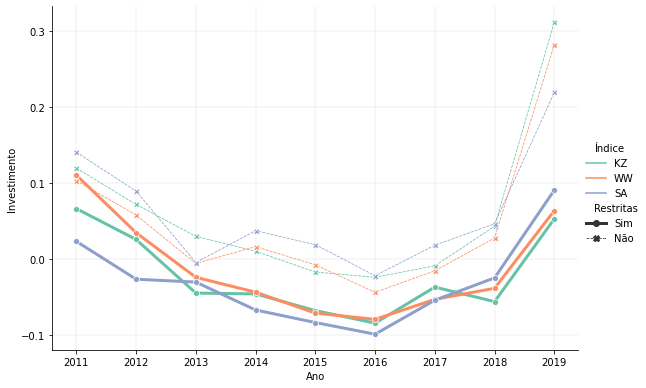

In [35]:
sns.relplot(
    data=inv_test, kind='line',
    x='Ano', y='Investimento',
    hue='Índice', style='Restritas',
    size='Restritas', palette='Set2',
    legend='brief', markers=True,
    aspect=1.5, height=5.5,
    facet_kws=dict(sharex=False))
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()

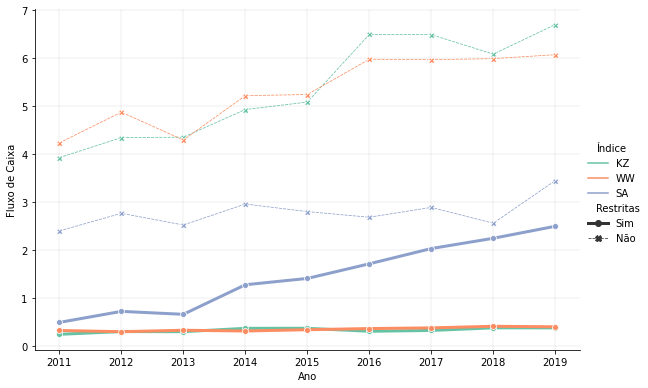

In [36]:
sns.relplot(
    data=inv_test, kind='line',
    x='Ano', y='Fluxo de Caixa',
    hue='Índice', style='Restritas',
    size='Restritas', palette='Set2',
    legend='brief', markers=True,
    aspect=1.5, height=5.5,
    facet_kws=dict(sharex=False))
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()

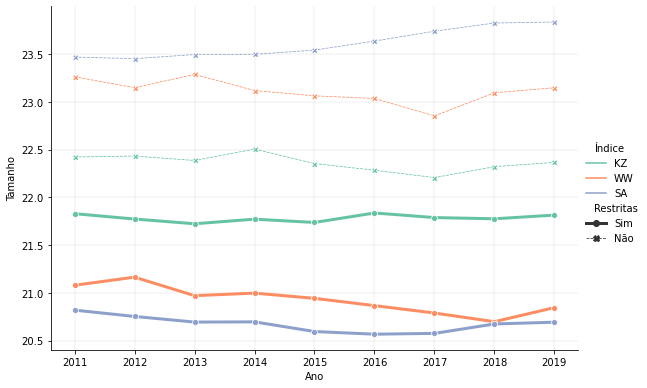

In [37]:
sns.relplot(
    data=inv_test, kind='line',
    x='Ano', y='Tamanho',
    hue='Índice', style='Restritas',
    size='Restritas', palette='Set2',
    legend='brief', markers=True,
    aspect=1.5, height=5.5,
    facet_kws=dict(sharex=False))
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()

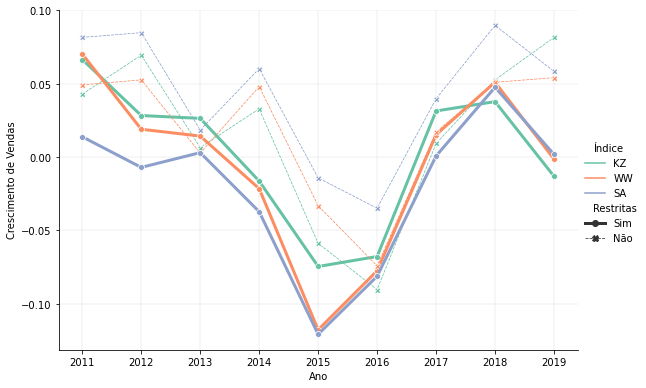

In [38]:
sns.relplot(
    data=inv_test, kind='line',
    x='Ano', y='Crescimento de Vendas',
    hue='Índice', style='Restritas',
    size='Restritas', palette='Set2',
    legend='brief', markers=True,
    aspect=1.5, height=5.5,
    facet_kws=dict(sharex=False))
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()

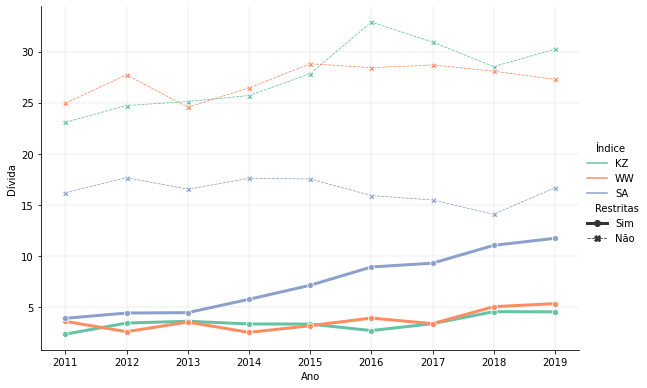

In [39]:
sns.relplot(
    data=inv_test, kind='line',
    x='Ano', y='Dívida',
    hue='Índice', style='Restritas',
    size='Restritas', palette='Set2',
    legend='brief', markers=True,
    aspect=1.5, height=5.5,
    facet_kws=dict(sharex=False))
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()

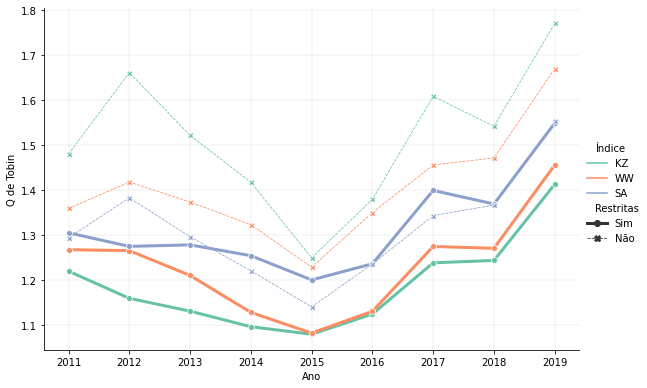

In [40]:
sns.relplot(
    data=inv_test, kind='line',
    x='Ano', y='Q de Tobin',
    hue='Índice', style='Restritas',
    size='Restritas', palette='Set2',
    legend='brief', markers=True,
    aspect=1.5, height=5.5,
    facet_kws=dict(sharex=False))
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()